In [ ]:
# Mount Google drive folder
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import os
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [ ]:
# Setup working directory and load data
DIR = '/content/drive/My Drive/Colab Notebooks/OddSem2020MAHE/'
FILENAMELIST = ['Data/hr1.txt', 'Data/hr2.txt']
os.chdir(DIR)
df = pd.concat([pd.read_csv(item, header = None) for item in FILENAMELIST], axis=1)
df.columns = ['HeartRateOne', 'HeartRateTwo']
df.insert(loc = 0, column = 'Time', value = np.arange(0, (df.shape[0]-1)*0.5 + 0.5, 0.5))

In [ ]:
stdev = lambda x: np.linalg.norm(x - np.mean(x)) / np.sqrt(len(x))

In [ ]:
def plotveccomp(x, name = None, axis = None):
  ax = axis
  component_index = range(0, len(x))
  ax.plot(component_index, x, color = 'black') 
  ax.plot(component_index, [np.mean(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='blue') 
  ax.plot(component_index, [np.mean(x) - stdev(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='red')
  ax.plot(component_index, [np.mean(x) + stdev(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='red')
  ax.set_xlabel('Component')
  ax.set_ylabel(name)
  #ax.set_title(' '.join(name.split()[0:2]) +  ' Vector')

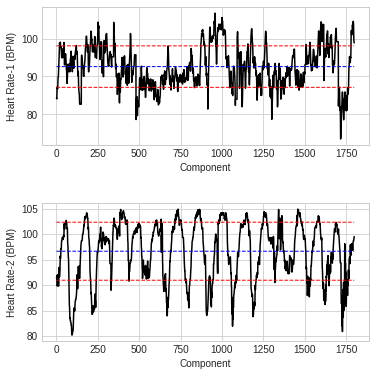

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (6,6))
fig.tight_layout(pad = 4.0)
plotveccomp(df['HeartRateOne'], 'Heart Rate-1 (BPM)', ax1)
plotveccomp(df['HeartRateTwo'], 'Heart Rate-2 (BPM)', ax2)

In [ ]:
def calcautocorr(x, lag = 0):
  # Build extended and lagged versions of vector
  a = np.hstack((x, np.mean(x)*np.ones(lag)))
  b = np.hstack((np.mean(x)*np.ones(lag), x))
  # Calculate correlation coefficient between de-meaned versions
  a_dm = a - np.mean(a)
  b_dm = b - np.mean(b)
  return(np.dot(a_dm, b_dm)/(np.linalg.norm(a_dm) * np.linalg.norm(b_dm)))

Text(0.5, 36.5, 'Component')

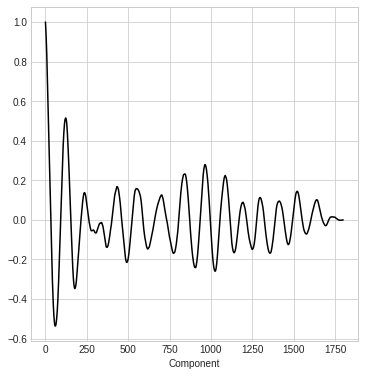

In [ ]:
HeartRateOne_AutoCorr = [calcautocorr(df['HeartRateTwo'], lag = j)
 for j in np.arange(0,len(df['HeartRateOne']))]
fig, ax3 = plt.subplots(1, 1, figsize = (6,6))
fig.tight_layout(pad = 4.0)
component_index = range(0, len(HeartRateOne_AutoCorr))
ax3.plot(component_index, HeartRateOne_AutoCorr, color = 'black') 
ax3.set_xlabel('Component')